In [2]:
 import pandas_datareader as pdr

In [3]:
#df = pdr.get_data_tiingo('AAPL',api_key = key)

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mdaiyub/Complete-Deep-Learning/main/DataSet/AAPL.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [5]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400
183,2018-03-29,167.804993,171.750000,166.899994,167.779999,167.779999,38398505


In [6]:
df1 = df.reset_index()['Close']

In [7]:
df1.shape

(184,)

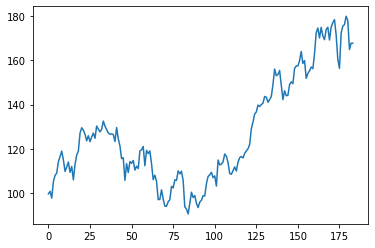

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
# LSTM are sensetive to the scale of the data. So that we apply MinMax scaler

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(184, 1)

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[test_size:len(df1),:1]

In [13]:
training_size, test_size

(119, 65)

In [14]:
# Convert an array of the values into a dataset matrix
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i: (i+time_step), 0 ]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0 ])
  return np.array(dataX), np.array(dataY)   

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train)

[[0.10172151 0.11412929 0.079924   ... 0.1974067  0.21059696 0.18354578]
 [0.11412929 0.079924   0.1643193  ... 0.21059696 0.18354578 0.19237655]
 [0.079924   0.1643193  0.19539463 ... 0.18354578 0.19237655 0.14095685]
 ...
 [0.17292646 0.251062   0.2977868  ... 0.23775994 0.21663319 0.26190476]
 [0.251062   0.2977868  0.31757214 ... 0.21663319 0.26190476 0.28448473]
 [0.2977868  0.31757214 0.40867433 ... 0.26190476 0.28448473 0.29063269]]


In [17]:
X_test

array([[0.16476643, 0.0719875 , 0.07388777, ..., 0.94064388, 0.89011847,
        0.94399737],
       [0.0719875 , 0.07388777, 0.12184218, ..., 0.89011847, 0.94399737,
        0.90017893],
       [0.07388777, 0.12184218, 0.07623518, ..., 0.94399737, 0.90017893,
        0.8813995 ],
       ...,
       [0.21607424, 0.16946125, 0.03599375, ..., 0.9499218 , 0.95785838,
        1.        ],
       [0.16946125, 0.03599375, 0.02459204, ..., 0.95785838, 1.        ,
        0.97809086],
       [0.03599375, 0.02459204, 0.        , ..., 1.        , 0.97809086,
        0.83188024]])

In [18]:
X_train.shape, y_train.shape

((18, 100), (18,))

In [19]:
X_test.shape, y_test.shape

((18, 100), (18,))

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
# Create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_train,y_test),epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.0528 - val_loss: 0.7099
Epoch 2/100
1/1 [==============================] - 0s 176ms/step - loss: 0.0328 - val_loss: 0.6193
Epoch 3/100
1/1 [==============================] - 0s 177ms/step - loss: 0.0161 - val_loss: 0.5177
Epoch 4/100
1/1 [==============================] - 0s 165ms/step - loss: 0.0044 - val_loss: 0.4057
Epoch 5/100
1/1 [==============================] - 0s 159ms/step - loss: 0.0027 - val_loss: 0.3295
Epoch 6/100
1/1 [==============================] - 0s 163ms/step - loss: 0.0108 - val_loss: 0.3302
Epoch 7/100
1/1 [==============================] - 0s 168ms/step - loss: 0.0107 - val_loss: 0.3649
Epoch 8/100
1/1 [==============================] - 0s 171ms/step - loss: 0.0060 - val_loss: 0.4099
Epoch 9/100
1/1 [==============================] - 0s 160ms/step - loss: 0.0026 - val_loss: 0.4525
Epoch 10/100
1/1 [==============================] - 0s 173ms/step - loss: 0.0018 - val_loss: 0.4862
Epoch 11/100

In [25]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [26]:
# Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [27]:
# Transform ban=ck to the original data
trian_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.03968235825322906

In [29]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

132.62084152449404

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: ignored